In [1]:
import pandas as pd

### 1. Import Dataset

In [2]:
df_test = pd.read_excel('/Users/xuzhuxuan/Desktop/cia_test_control/test_cia.xlsx')
df_test = df_test.iloc[:,1:]
df_test

,id_mask,age,city,gender,set_126
0,0,30-34,广州市,女,"[15, 5]"
1,1,20-24,襄阳市,女,"[10, 1, 11, 13, 14, 4, 8]"
2,2,30-34,海口市,女,"[13, 4, 14]"
3,3,25-29,无锡市,女,"[1, 5, 12, 14, 11, 6, 4, 9, 2, 15]"
4,4,30-34,雅安市,女,"[15, 11, 12, 1, 5, 8, 4, 10, 13]"
...,...,...,...,...,...
32388,32388,25-29,北京市,女,"[15, 10, 3, 11, 2, 9, 14, 5, 7, 4]"
32389,32389,18-19,滁州市,女,"[3, 8, 10]"
32390,32390,18-19,贵阳市,女,"[11, 10, 9, 12, 15]"
32391,32391,20-24,安阳市,女,"[5, 11, 3, 7]"


In [3]:
df_control = pd.read_excel('/Users/xuzhuxuan/Desktop/cia_test_control/control_cia.xlsx')
df_control = df_control.iloc[:,1:]
df_control

,id_mask,age,city,gender,set_126
0,32393,25-29,洛阳市,女,"[13, 14, 12, 4, 6, 5, 2, 9]"
1,32394,25-29,揭阳市,男,"[1, 3, 13, 4, 2, 15, 10, 7, 9, 6]"
2,32395,20-24,北京市,女,"[6, 9, 8, 15, 2, 10]"
3,32396,45-49,广州市,女,"[15, 14, 10, 11, 9]"
4,32397,18-19,随州市,男,"[7, 15, 5, 2, 13, 4, 12, 1]"
...,...,...,...,...,...
275339,307732,18-19,西安市,女,"[4, 15, 1, 12]"
275340,307733,45-49,成都市,女,"[14, 5, 13, 6, 4, 9, 12, 11, 15]"
275341,307734,40-44,成都市,男,"[8, 7, 2, 4, 9, 12, 1, 5, 10]"
275342,307735,25-29,随州市,女,"[4, 5, 15]"


### 2. Data Preprocessing

In [4]:
def clean(row):
    string = row['set_126'].replace('[', '').replace(']', '').replace(' ', '')
    set1 = set([int(s) for s in string.split(',')]) 
    set2 = {x for x in set1 if x <= 5} # only keep the number 1-5
    return set2

In [5]:
df_test['set_126'] = df_test.apply(clean, axis = 1)
df_control['set_126'] = df_control.apply(clean, axis = 1)
df_test

,id_mask,age,city,gender,set_126
0,0,30-34,广州市,女,{5}
1,1,20-24,襄阳市,女,"{1, 4}"
2,2,30-34,海口市,女,{4}
3,3,25-29,无锡市,女,"{1, 2, 4, 5}"
4,4,30-34,雅安市,女,"{1, 4, 5}"
...,...,...,...,...,...
32388,32388,25-29,北京市,女,"{2, 3, 4, 5}"
32389,32389,18-19,滁州市,女,{3}
32390,32390,18-19,贵阳市,女,{}
32391,32391,20-24,安阳市,女,"{3, 5}"


In [6]:
test_list = df_test.index.tolist()
control_list = df_control.index.tolist()

for i in test_list:
    df_test.at[i, 'label'] = df_test.iloc[i]['age'] + df_test.iloc[i]['city'] + df_test.iloc[i]['gender'] + str(df_test.iloc[i]['set_126'])
    
for i in control_list:
    df_control.at[i, 'label'] = df_control.iloc[i]['age'] + df_control.iloc[i]['city'] + df_control.iloc[i]['gender'] + str(df_control.iloc[i]['set_126'])

df_test

,id_mask,age,city,gender,set_126,label
0,0,30-34,广州市,女,{5},30-34广州市女{5}
1,1,20-24,襄阳市,女,"{1, 4}","20-24襄阳市女{1, 4}"
2,2,30-34,海口市,女,{4},30-34海口市女{4}
3,3,25-29,无锡市,女,"{1, 2, 4, 5}","25-29无锡市女{1, 2, 4, 5}"
4,4,30-34,雅安市,女,"{1, 4, 5}","30-34雅安市女{1, 4, 5}"
...,...,...,...,...,...,...
32388,32388,25-29,北京市,女,"{2, 3, 4, 5}","25-29北京市女{2, 3, 4, 5}"
32389,32389,18-19,滁州市,女,{3},18-19滁州市女{3}
32390,32390,18-19,贵阳市,女,{},18-19贵阳市女set()
32391,32391,20-24,安阳市,女,"{3, 5}","20-24安阳市女{3, 5}"


### 3. Find Match 

In [8]:
# create a dictionary for the test data, key is the label, value is the occurance of each label
lst = df_test['label'].tolist()
d = {x:lst.count(x) for x in lst}
list(d.items())[:10]

[('30-34广州市女{5}', 11),
 ('20-24襄阳市女{1, 4}', 3),
 ('30-34海口市女{4}', 1),
 ('25-29无锡市女{1, 2, 4, 5}', 5),
 ('30-34雅安市女{1, 4, 5}', 1),
 ('35-39杭州市女set()', 2),
 ('40-44本溪市女set()', 1),
 ('25-29黔南布依族苗族自治州女{2}', 1),
 ('30-34沈阳市女{4}', 5),
 ('25-29嘉兴市女{4}', 3)]

In [9]:
import random

matched_id = []

for key,value in d.items():
    lst = df_control[df_control['label'] == key]['id_mask'].tolist()
    if lst:
        lst_sample = random.choices(lst, k=value)
        matched_id.extend(lst_sample)
    if not lst:
        matched_id.extend('N' * value)
        

In [10]:
matched_id[:10]

[272678, 238517, 38814, 157320, 165198, 189439, 60618, 207710, 260994, 115723]

In [11]:
len(matched_id)

32393

In [12]:
test_id = []

for key,value in d.items():
    lst = df_test[df_test['label'] == key]['id_mask'].tolist()
    test_id.extend(lst)

In [13]:
test_id[:10]

[0, 4809, 11201, 11741, 15974, 17809, 17853, 18368, 25490, 29100]

In [14]:
df_match = pd.DataFrame({'test':test_id, 'control':matched_id})
df_match

,test,control
0,0,272678
1,4809,238517
2,11201,38814
3,11741,157320
4,15974,165198
...,...,...
32388,32363,156541
32389,32377,214940
32390,32380,103915
32391,32387,84852


In [15]:
# get rid of unmatched data
df_match = df_match[df_match['control'] != 'N']
df_match

,test,control
0,0,272678
1,4809,238517
2,11201,38814
3,11741,157320
4,15974,165198
...,...,...
32386,32350,296849
32388,32363,156541
32389,32377,214940
32390,32380,103915


### 4. Validation

In [18]:
print(df_test[df_test['id_mask'] == 0])
print(df_control[df_control['id_mask'] == 272678])

   id_mask    age city gender set_126         label
0        0  30-34  广州市      女     {5}  30-34广州市女{5}
        id_mask    age city gender set_126         label
240285   272678  30-34  广州市      女     {5}  30-34广州市女{5}


In [20]:
print(df_test[df_test['id_mask'] == 32387])
print(df_control[df_control['id_mask'] == 84852])

       id_mask    age   city gender set_126           label
32387    32387  30-34  阿勒泰地区      女     {4}  30-34阿勒泰地区女{4}
       id_mask    age   city gender set_126           label
52459    84852  30-34  阿勒泰地区      女     {4}  30-34阿勒泰地区女{4}


In [21]:
print(df_test[df_test['id_mask'] == 32350])
print(df_control[df_control['id_mask'] == 296849])

       id_mask    age        city gender set_126                  label
32350    32350  45-49  黔南布依族苗族自治州      女      {}  45-49黔南布依族苗族自治州女set()
        id_mask    age        city gender set_126                  label
264456   296849  45-49  黔南布依族苗族自治州      女      {}  45-49黔南布依族苗族自治州女set()


In [48]:
df = pd.DataFrame(columns = df_control.columns)
for i in df_match['control'].tolist():
    df = df.append(df_control[df_control['id_mask'] == i])

<AxesSubplot:>

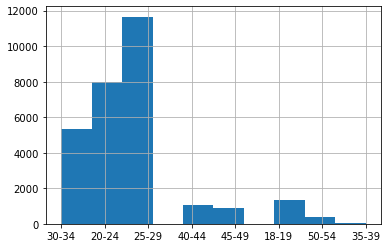

In [49]:
df['age'].hist()

In [50]:
df2 = pd.DataFrame(columns = df_test.columns)
for i in df_match['test'].tolist():
    df2 = df2.append(df_test[df_test['id_mask'] == i])

<AxesSubplot:>

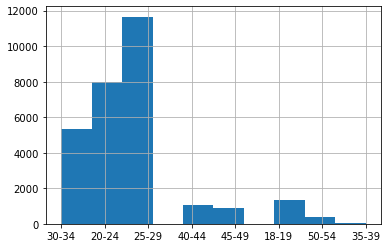

In [52]:
df2['age'].hist()